# Introducción a Python

## Visualización con Python: Ipywidgets

Los widgets son objetos de Python que producen de eventos reproducibles en el navegador, comunmente pueden ser botones, controles deslizantes, un cuadro de texto, etc.

El uso de estos objetos requiere la importar el paque `ipywidgets`. Para instalar el paquete, puede hacerse mediante el manejador de paquetes `conda` con la instrucción: 
`conda install -c conda-forge ipywidgets`

La mayoría de las veces, la instalación de `ipywidgets configura automáticamente Jupyter Notebook para usar widgets.

In [3]:
!conda list ipywidgets

# packages in environment at /home/oscar/anaconda3:
#
# Name                    Version                   Build  Channel
ipywidgets                8.0.4              pyhd8ed1ab_0    conda-forge


In [6]:
import ipywidgets as widgets

### Construcción de un widget

Los widgets tienen su propia representación de visualización que les permite mostrarse utilizando el marco de visualización de IPython. La construcción y devolución de un `IntSlider` muestra automáticamente el widget. Los widgets se muestran dentro del área de salida debajo de la celda de código. Borrar la salida de la celda también eliminará el widget.

In [8]:
widgets.IntSlider()

IntSlider(value=0)

También puede mostrar explícitamente el widget usando `display()`

In [10]:
from IPython.display import display

w = widgets.IntSlider()
display(w)

IntSlider(value=0)

Puede cerrarse un widget explícitamente con `close()`

In [12]:
display(w)

IntSlider(value=0)

In [13]:
w.close()

### Propiedades de un widget

Todos los widgets de IPython comparten un esquema de nombres similar. Para leer el valor de un widget, puede consultar su propiedad de `value`:

In [17]:
w = widgets.IntSlider()
display(w)


IntSlider(value=0)

In [18]:
w.value

40

Además del valor, la mayoría de los widgets comparten claves, descripción y estado (si están deshabilitados). Para ver la lista completa de propiedades sincronizadas de cualquier widget específico, se puede consultar la propiedad `keys`.

In [19]:
w.keys

['_dom_classes',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'behavior',
 'continuous_update',
 'description',
 'description_allow_html',
 'disabled',
 'layout',
 'max',
 'min',
 'orientation',
 'readout',
 'readout_format',
 'step',
 'style',
 'tabbable',
 'tooltip',
 'value']

### Inicialización de un widget

Al crear un widget se pueden establecer algunos o todos los valores iniciales de ese widget definiéndolos como argumentos de palabras clave en el constructor del widget:

In [21]:
widgets.Text(value='Hello World!', disabled=True)

Text(value='Hello World!', disabled=True)

### Vincular dos widgets similares

Si se necesita mostrar el mismo valor de dos maneras diferentes, tendrá que usar dos widgets diferentes. En lugar de intentar sincronizar manualmente los valores de los dos widgets, puede usarse la función `link` o `jslink` para vincular dos propiedades.

In [22]:
a = widgets.FloatText()
b = widgets.FloatSlider()
display(a,b)

mylink = widgets.jslink((a, 'value'), (b, 'value'))


FloatText(value=0.0)

FloatSlider(value=0.0)

### Desvincular widgets

Desvincular los widgets es simple. Todo lo que tiene que hacerse es llamar a `.unlink` en el objeto de enlace. 

In [23]:
mylink.unlink()

### Lista de widgets

#### Widgets numéricos
Hay muchos widgets distribuidos con ipywidgets diseñados para mostrar valores numéricos. Existen widgets para mostrar números enteros y flotantes, tanto acotados como ilimitados. Los widgets de enteros comparten un esquema de nombres similar a sus contrapartes de punto flotante. Al reemplazar `Float` con `Int` en el nombre del widget, puede encontrar el equivalente de Integer.

#### IntSlider

El control deslizante entero se muestra con un `value` inicial especificado. Los límites inferior y superior están definidos por `min` y `max`, y el valor se puede incrementar según el parámetro `step`. 

- La etiqueta del control deslizante está definida por el parámetro `description`. 
- La orientación del control deslizante `orientation` es `horizontal` (predeterminada) o `vertical`.
- El parámetro `readout` muestra el valor actual del control deslizante junto a él. Las opciones son `True` (predeterminado) o `False`.
- `readout_format` especifica el formato utilizado para representar el valor del control deslizante, el valor predeterminado es `.2f`

In [24]:
widgets.IntSlider(
    value=7,
    min=0,
    max=10,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

IntSlider(value=7, continuous_update=False, description='Test:', max=10)

#### FloatSlider

In [26]:
widgets.FloatSlider(
    value=7.5,
    min=0,
    max=10.0,
    step=0.1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

FloatSlider(value=7.5, continuous_update=False, description='Test:', max=10.0, readout_format='.1f')

Un ejemplo de un `slider` desplegado verticalmente:

In [27]:
widgets.FloatSlider(
    value=7.5,
    min=0,
    max=10.0,
    step=0.1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='vertical',
    readout=True,
    readout_format='.1f',
)


FloatSlider(value=7.5, continuous_update=False, description='Test:', max=10.0, orientation='vertical', readout…

#### FloatLogSlider

El `FloatLogSlider` tiene una escala logarítmica, lo que facilita tener un control deslizante que cubra una amplia gama de magnitudes positivas.-
- Los parámetros `min` y `max` refieren a los exponentes mínimo y máximo de la base
- El parámetro `value` refiere al valor real del control deslizante.

In [36]:
widgets.FloatLogSlider(
    value=10,
    base=10,
    min=-10, # max exponent of base
    max=10, # min exponent of base
    step=0.2, # exponent step
    description='Log Slider'
)

FloatLogSlider(value=10.0, description='Log Slider', max=10.0, min=-10.0, step=0.2)

#### FloatText

In [37]:
widgets.FloatText(
    value=7.5,
    description='Número:',
    disabled=False
)

FloatText(value=7.5, description='Número:')

#### Checkbox

- El parámetro `value` especifica el valor de la casilla de verificación
- El parámetro `indent` coloca una casilla de verificación con sangría, alineada con otros controles. Las opciones son `True`(predeterminado) o `False`.

In [38]:
widgets.Checkbox(
    value=False,
    description='Check me',
    disabled=False,
    indent=False
)

Checkbox(value=False, description='Check me', indent=False)

### Lista y funcionalidad de widgets

En general, se tienen diversas categorias de widgets como los numéricos, boolenos, selección, cadenas, imagen, botones, animación, etc. La lista completa de widgets y ejemplos de inicializacion pueden consultarse en el sitio de [Jupyter Widgets](https://ipywidgets.readthedocs.io/en/stable/index.html).  

## Interact

Los widgets de salida forman la base de cómo se implementan los métodos interactivos. Se pueden usar para crear diseños enriquecidos de ejecución de código. Una forma sencilla de personalizar el aspecto de una interfaz de usuario interactiva es usar la función `interactive_output` para conectar los controles a una función cuya salida se captura en el widget de salida devuelto.

La función de interacción, `ipywidgets.interact` crea automáticamente controles de interfaz de usuario (UI) para explorar código y datos de forma interactiva. Es la forma más fácil de comenzar a usar los widgets de IPython.

In [100]:
from ipywidgets import interact, interactive, fixed, interact_manual

### Uso básico de interact
En el nivel más básico de `interact` genera automáticamente controles de interfaz de usuario para argumentos de función y luego llama a la función con esos argumentos cuando manipula los controles de forma interactiva. 
Para usar `interac` se debe definir una función que desee explorar

In [101]:
def f(x):
    return x

In [104]:
interact(f, x=True);  # ; evita la salida descriptiva del objeto

interactive(children=(Checkbox(value=True, description='x'), Output()), _dom_classes=('widget-interact',))

Se envió el valor `True` a `f(x)`

In [105]:
interact(f, x='Hi there!');

interactive(children=(Text(value='Hi there!', description='x'), Output()), _dom_classes=('widget-interact',))

Se envió la cadena `Hi there!!` como argumento a `f()`

In [106]:
def h(p, q):
    return (p, q)

In [107]:
interact(h, p=5, q=fixed(20));

interactive(children=(IntSlider(value=5, description='p', max=15, min=-5), Output()), _dom_classes=('widget-in…

Se invocó la función `h` con valor de los argumentos `p` y `q`. 

In [110]:
widgets.IntSlider(min=-10, max=30, step=1, value=10)

IntSlider(value=10, max=30, min=-10)

In [111]:
interact(f, x=widgets.IntSlider(min=-10, max=30, step=1, value=10));

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

Se creó el widget `IntSlider` cuyo valor se pasa como argumento a la función `f(x)` 

In [115]:
interact(f, x=(0,4));

interactive(children=(IntSlider(value=2, description='x', max=4), Output()), _dom_classes=('widget-interact',)…

In [117]:
interact(f, x=(0,8,2));

interactive(children=(IntSlider(value=4, description='x', max=8, step=2), Output()), _dom_classes=('widget-int…

In [118]:
interact(f, x=(0.0,10.0));

interactive(children=(FloatSlider(value=5.0, description='x', max=10.0), Output()), _dom_classes=('widget-inte…

In [119]:
interact(f, x=(0.0,10.0,0.01));

interactive(children=(FloatSlider(value=5.0, description='x', max=10.0, step=0.01), Output()), _dom_classes=('…

Se crearon por defecto los widgets `IntSlider`, `FlotSlider` con valores dentro de intervalos diferentes. 

In [121]:
interact(f, x=['apples','oranges']);

interactive(children=(Dropdown(description='x', options=('apples', 'oranges'), value='apples'), Output()), _do…

Se creó por defecto una lista desplegable `Combobox` cuando se pasa una lista al argumento `x` 

In [124]:
interact(f, x=[('one', 10), ('two', 20)]);

interactive(children=(Dropdown(description='x', options=(('one', 10), ('two', 20)), value=10), Output()), _dom…

Se creó por defecto una lista desplegable con valores tipo `tuple` dentro de una lista como valor del argumento `x` 

In [126]:
interact(f, x=widgets.Combobox(options=["Chicago", "New York", "Washington"], value="Chicago"));

interactive(children=(Combobox(value='Chicago', description='x', options=('Chicago', 'New York', 'Washington')…

`Combobox` con opciones.

Una forma _pythonica_ para vincular widgets con funciones es por medio de [decoradores](https://codigofacilito.com/articulos/decoradores-python).

In [120]:
@interact(x=(0.0,20.0,0.5))
def h(x=5.5):
    return x

interactive(children=(FloatSlider(value=5.5, description='x', max=20.0, step=0.5), Output()), _dom_classes=('w…

### Interactive_output

`interactive_output` proporciona flexibilidad adicional: puede controlar cómo se distribuyen los elementos de la interfaz de usuario.

A diferencia de `interact`, `interactive_output` no genera una interfaz de usuario para los widgets. Esto es poderoso, porque significa que puede crearse un widget, ponerlo en un cuadro y luego pasar el widget a `interactive_output` y tener control sobre el widget y su diseño.

In [138]:
a = widgets.IntSlider(description='a')
b = widgets.IntSlider(description='b')
c = widgets.IntSlider(description='c')

def f(a, b, c):
    print('{}*{}*{}={}'.format(a, b, c, a*b*c))

out = widgets.interactive_output(f, {'a': a, 'b': b, 'c': c})

widgets.HBox([widgets.VBox([a, b, c]), out])

En este ejemplo se apilaron los controles verticalmente, luego se coloca la salida de la función a la derecha.

#### `Interactive_output` con funciones matemáticas

In [63]:
import numpy as np
import matplotlib.pyplot as plt

Vamos a graficar la función $f(x)= 2x \cdot sen(2 \pi x)$

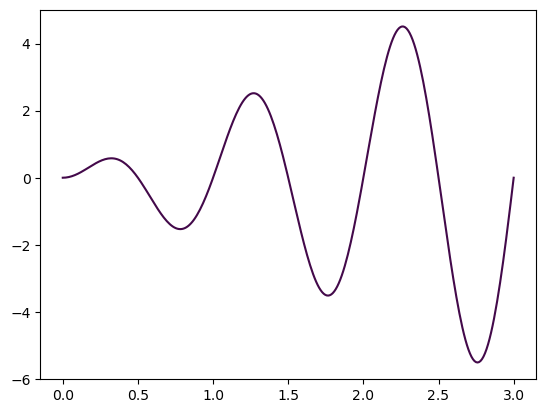

In [72]:
x = np.linspace(0,3, num=300)
y = 2 * x * np.sin(2 * np.pi * x)
plt.plot(x, y, color = '#43094a')

La frecuencia o ciclo de repetición de la onda $2 \cdot \pi$ puede modificarse y enviarse como parámetro $f(x)$

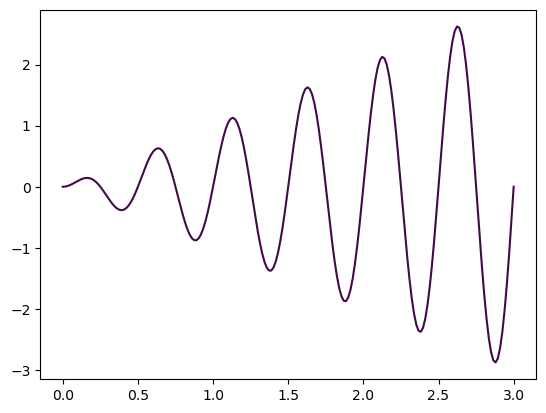

In [77]:
freq = 4*np.pi
x = np.linspace(0,3, num=200)
y = x * np.sin(freq * x)
plt.plot(x, y, color = '#43094a')

Para variar la frecuencia de manera más flexible, envolvemos el código de la gráfica en una función `pinta_funcion()` que recibe la frecuencia `freq` como argumento 

In [84]:
def pinta_funcion(freq):
    x = np.linspace(0,3, num=200)
    y = x * np.sin(freq * x)
    plt.plot(x, y, color = '#43094a' )
    plt.ylim(-5, 5)
    plt.title("Gráfica de función $f(x)= 2x \cdot sen(freq \cdot x)$ ")

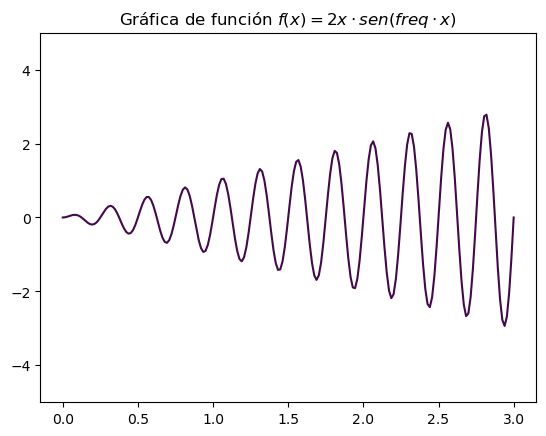

In [85]:
pinta_funcion(8 * np.pi)

Usemos `interact` para agregar la frecuencia de forma interactiva

In [95]:
FreqSlider = widgets.FloatSlider(
    value=8 * np.pi,
    min=2 * np.pi,
    max=20 * np.pi ,
    step=2 * np.pi,
    description='Frecuencia',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)

out = widgets.interactive_output(pinta_funcion, {'freq':FreqSlider})
widgets.HBox([widgets.VBox([FreqSlider]), out])